In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 18.0

In [2]:
#What are the names of files present in the 'grad project' directory?
sorted(os.listdir("."))

['.ipynb_checkpoints',
 'Grad Project Total.ipynb',
 'Grad Project-1.ipynb',
 'Grad_Project_Rachael.ipynb',
 'combined_dataframes.csv',
 'draft grad project.ipynb',
 'emissions.csv',
 'global_development.csv',
 'global_development.json']

In [3]:
#What are the paths of all the files in the 'grad project' directory?
file_paths = []
for file in os.listdir("."):
    file_paths.append(os.path.join(".", file))
file_paths

['.\\.ipynb_checkpoints',
 '.\\combined_dataframes.csv',
 '.\\draft grad project.ipynb',
 '.\\emissions.csv',
 '.\\global_development.csv',
 '.\\global_development.json',
 '.\\Grad Project Total.ipynb',
 '.\\Grad Project-1.ipynb',
 '.\\Grad_Project_Rachael.ipynb']

In [4]:
#create a function to read the json file
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

In [5]:
#load the emissions.csv into pandas DataFrame
emissions_df = pd.read_csv('.\\emissions.csv')
emissions_df.head(3)

,Country,Year,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,Emissions.Sector.Power Industry,Emissions.Sector.Buildings,Emissions.Sector.Transport,Emissions.Sector.Other Industry,Emissions.Sector.Other sectors,Ratio.Per GDP,Ratio.Per Capita
0,Afghanistan,1970,2670.0,1820.0,12800.0,0.06,0.58,0.23,0.07,0.53,1.557705,0.0
1,Afghanistan,1971,2630.0,1850.0,12900.0,0.06,0.58,0.23,0.07,0.53,1.517670,0.0
2,Afghanistan,1972,2180.0,1810.0,11900.0,0.12,0.46,0.27,0.05,0.61,1.357590,0.0


In [6]:
#converting the two datasets into lists
country_emissions_list = list(set(list(emissions_df["Country"])))
development_json = read_json('.\\global_development.json') #this returns a list of dicts
emissions_countries = sorted(country_emissions_list)
print(len(emissions_countries))

195


### sorting out entries from global_development_json containing countries that are also present in emissions_csv (because Khine used global_development in json format, emissions in csv format)

In [7]:
select_country_development = []
for data in development_json:
    for country in country_emissions_list:
        if data["Country"] == country:
            select_country_development.append(data)

#print(select_country_development[:1]) 
#select_country_development = a modified development dataset in the form of a list of dicts 
                              #containing countries that are also present in the emissions dataset
countries = []
for data in select_country_development:
    countries.append(data['Country'])
development_countries = sorted(list(set(countries)))
print(len(development_countries))

133


In [8]:
#list of countries that are only in emissions_csv
countries_only_in_emissions = []
for country in emissions_countries:
    if not country in development_countries:
        countries_only_in_emissions.append(country)
print(len(countries_only_in_emissions))

62


### Merging emissions and global_development csv (because Rachael used both the emissions and global_development files in csv format)

In [9]:
development_df = pd.read_csv('global_development.csv', keep_default_na=False, na_values=[''])
emissions_df = pd.read_csv('emissions.csv', keep_default_na=False, na_values=[''])

In [10]:
merged_dataframes = pd.merge(left = emissions_df, right = development_df, left_on = ["Country", "Year"], right_on=["Country", "Year"])
merged_dataframes.to_csv('combined_dataframes.csv', index=False)

In [11]:
combined = pd.read_csv('combined_dataframes.csv', keep_default_na=False, na_values=[''])

In [12]:
df = combined

## Q 1: Which countries are represented in both the emissions and global_development files?

In [13]:
common_countries = []
for entry in select_country_development:
    common_countries.append(entry['Country'])
common_countries_sorted = sorted(list(set(common_countries)))
print(common_countries_sorted)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Fiji', 'Finland', 'French Polynesia', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Nami

## Q 2: Which 5 countries have the highest rural population growth? Find countries with highest rural pop growth, compare with power emissions.

In [14]:
countries_growth = df[['Country','Data.Rural Development.Rural Population Growth','Emissions.Sector.Power Industry']]
avg_countries_growth = countries_growth.groupby('Country', as_index=False).mean()

In [15]:
countries_by_rural_develop = avg_countries_growth.sort_values("Data.Rural Development.Rural Population Growth")
countries_by_rural_develop.tail()

,Country,Data.Rural Development.Rural Population Growth,Emissions.Sector.Power Industry
125,Uganda,3.046389,0.230909
38,Equatorial Guinea,3.107567,0.055152
90,Niger,3.152168,0.253939
8,Bahrain,3.509024,10.149697
126,United Arab Emirates,6.506964,27.967273


Text(0.5, 1.0, 'Relation between Rural Population Growth and Emissions from the Power Industry')

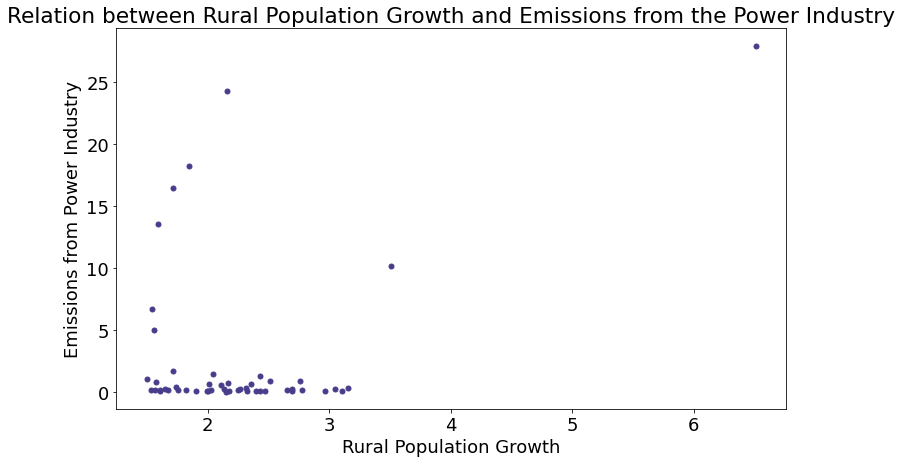

In [16]:
grow = countries_by_rural_develop.tail(50).plot.scatter(x="Data.Rural Development.Rural Population Growth", y="Emissions.Sector.Power Industry",s = 25,color = 'darkslateblue', figsize = (12,7))
grow.set_xlabel("Rural Population Growth")
grow.set_ylabel('Emissions from Power Industry')
grow.set_title("Relation between Rural Population Growth and Emissions from the Power Industry")

## Q 3: What are the overall life expectancies for men and women? 

In [17]:
death_rate = df["Data.Health.Death Rate"]
life_men = df['Data.Health.Life Expectancy at Birth, Male']
life_women = df["Data.Health.Life Expectancy at Birth, Female"]
life_expectancies = df[['Country','Data.Health.Life Expectancy at Birth, Male','Data.Health.Life Expectancy at Birth, Female']]
avg_life_expectancies = life_expectancies.groupby('Country',as_index=False).mean()
avg_life_expectancies

,Country,"Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Female"
0,Afghanistan,50.188121,52.257091
1,Albania,70.529030,76.214545
2,Algeria,65.300212,68.322818
3,Angola,42.429909,45.618061
4,Antigua and Barbuda,69.728667,74.754606
...,...,...,...
128,United States,72.989091,79.132121
129,Uruguay,70.026485,77.300121
130,Vanuatu,63.515970,66.923364
131,Zambia,45.517758,47.298273


In [18]:
# How do those life expectancies correspond with emissions (CO2, NO2, and CH4)?
CO2_emission = df["Emissions.Type.CO2"].astype(int)
NO2_emission = df['Emissions.Type.N2O'].astype(int)
CH4_emission = df["Emissions.Type.CH4"].astype(int)

In [19]:
country_emissions = df[['Country','Emissions.Type.CO2','Emissions.Type.N2O','Emissions.Type.CH4', 'Data.Health.Life Expectancy at Birth, Male', 'Data.Health.Life Expectancy at Birth, Female']].groupby('Country', as_index=False).mean()

In [20]:
# What are the average CO2 emissions per country?
countries_by_co2_emissions = country_emissions.sort_values("Emissions.Type.CO2")
countries_by_co2_emissions

,Country,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,"Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Female"
65,Kiribati,3.988182,1.975455e+01,2.619091e+01,59.707394,65.117545
106,Sao Tome and Principe,6.914848,3.043030e+01,3.741818e+01,60.985818,64.620364
74,Maldives,10.750000,3.396970e+01,2.835727e+02,64.906364,65.021667
47,Grenada,13.507273,3.626667e+01,2.469000e+02,67.147333,71.730091
4,Antigua and Barbuda,17.793939,4.820000e+01,2.636667e+02,69.728667,74.754606
...,...,...,...,...,...,...
79,Mexico,64272.727273,1.264545e+05,3.498182e+05,69.529788,75.068000
16,Brazil,81225.000000,1.900000e+05,2.702917e+05,60.032292,65.875125
56,India,171121.212121,6.617576e+05,9.753333e+05,59.629000,61.310485
128,United States,292939.393939,6.482424e+05,5.350909e+06,72.989091,79.132121


## Q4: What are the top 10 countries CO2 emission rates? 

Text(0.5, 0, 'CO2 Emission Rates')

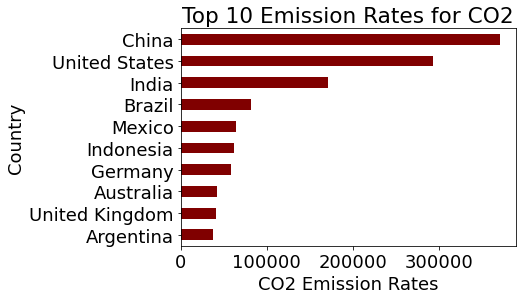

In [21]:
country_co2_emission = df[['Country','Emissions.Type.CO2']]
grouped_co2 = country_co2_emission.groupby('Country', as_index=False).mean()
x = grouped_co2.set_index("Country")
ax = x.sort_values("Emissions.Type.CO2").tail(10).plot.barh(color = 'maroon', legend = False)
ax.set_title("Top 10 Emission Rates for CO2")
ax.set_xlabel("CO2 Emission Rates")

## Q5: Is there a correlation between life expectancies and CO2 emissions?

Text(0.5, 1.0, 'Average Life Expectancies for Males and Females with CO2 Emission Rates')

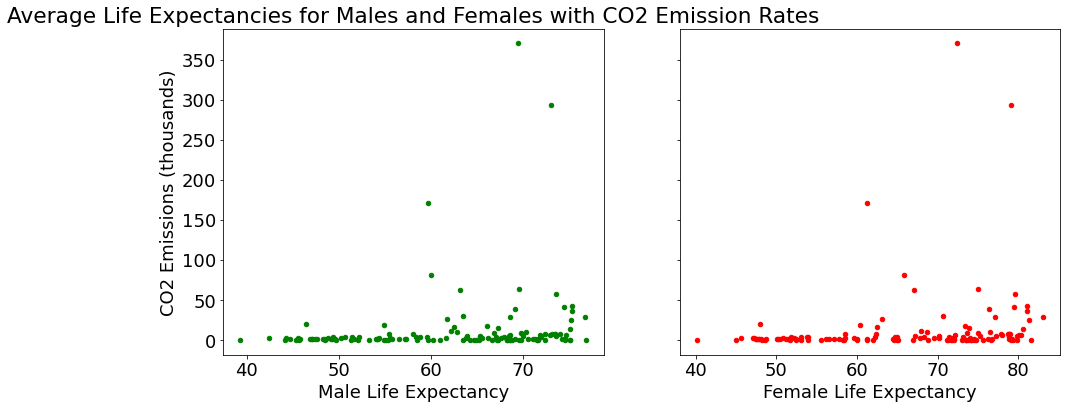

In [22]:
fig, axes = plt.subplots(ncols = 2, sharey = True)
country_emissions['CO2 Emissions Thousands'] = country_emissions['Emissions.Type.CO2']/1000

ax1 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Male', y='CO2 Emissions Thousands', ax = axes[0], figsize = (15,6), color = 'g')
ax2 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Female', y='CO2 Emissions Thousands', ax = axes[1], figsize = (15,6), color = 'r')

ax1.set_xlabel('Male Life Expectancy')
ax2.set_xlabel("Female Life Expectancy")
ax1.set_ylabel("CO2 Emissions (thousands)")
ax1.set_title("Average Life Expectancies for Males and Females with CO2 Emission Rates")

### - Overall, there seems to not be a great trend between CO2 and life expectancy, and even countries with the highest CO2 emissions have fairly high life expectancies

## Q 6: Is there a trend with life expectancies and NO2?

Text(0.5, 1.0, 'Average Life Expectancies for Males and Females with N2O Emission Rates')

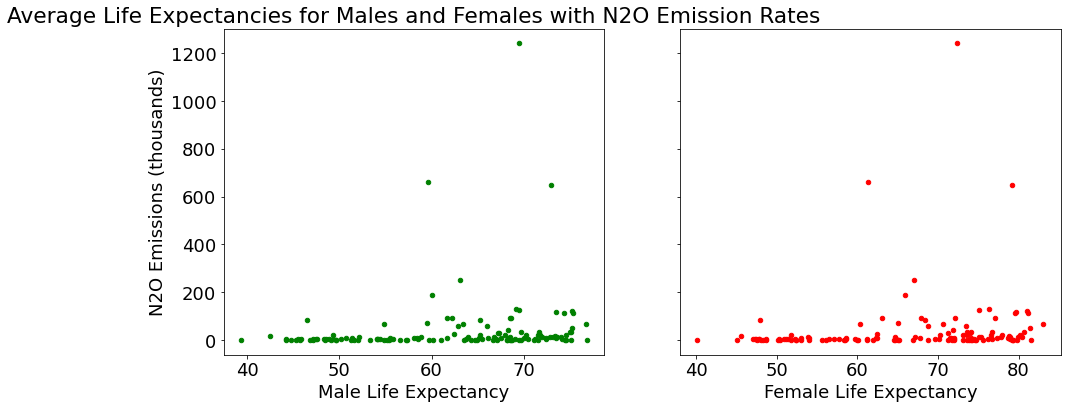

In [23]:
fig, axes = plt.subplots(ncols = 2, sharey = True)
country_emissions["NO2 Emissions Thousands"] = country_emissions['Emissions.Type.N2O']/1000

N2O_1 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Male', y='NO2 Emissions Thousands', ax = axes[0], figsize = (15,6), color = 'g')
N2O_2 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Female', y='NO2 Emissions Thousands', ax = axes[1], figsize = (15,6), color = 'r')

N2O_1.set_xlabel('Male Life Expectancy')
N2O_2.set_xlabel("Female Life Expectancy")
N2O_1.set_ylabel("N2O Emissions (thousands)")
N2O_1.set_title("Average Life Expectancies for Males and Females with N2O Emission Rates")

### - Similar to CO2, there is not really a tend with the NO2 emissions having an impact on the life expectancies of males and females

## Q7: Is there a trend with ch4?

Text(0.5, 1.0, 'Average Life Expectancies for Males and Females with CH4 Emission Rates')

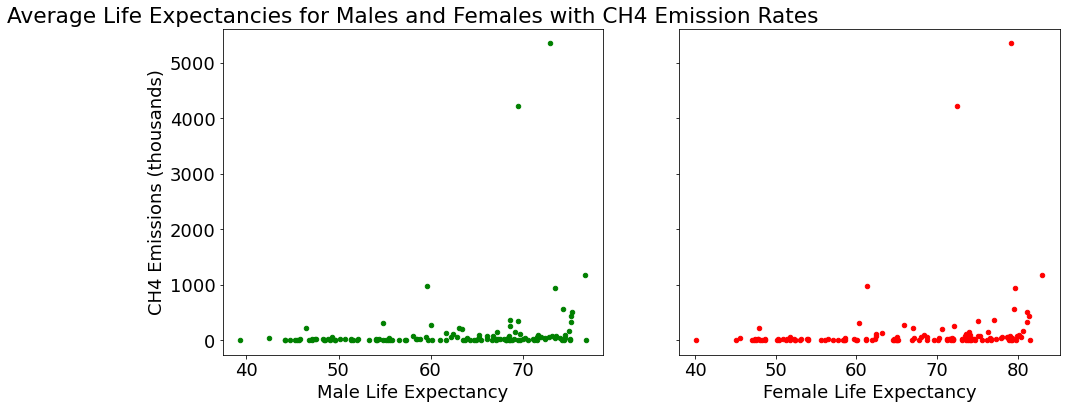

In [24]:
fig, axes = plt.subplots(ncols = 2, sharey = True)
country_emissions['CH4 Thousand'] = country_emissions['Emissions.Type.CH4']/1000
ch4_1 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Male', y='CH4 Thousand', ax = axes[0], figsize = (15,6), color = 'g')
ch4_2 = country_emissions.plot.scatter(x='Data.Health.Life Expectancy at Birth, Female', y='CH4 Thousand', ax = axes[1], figsize = (15,6), color = 'r')

ch4_1.set_xlabel('Male Life Expectancy')
ch4_2.set_xlabel("Female Life Expectancy")
ch4_1.set_ylabel("CH4 Emissions (thousands)")
ch4_1.set_title("Average Life Expectancies for Males and Females with CH4 Emission Rates")

### - Similarly to the previous two emissions, it seems that there is no clear correlation with the life expectancies being hindered by CO2, NO2, or CH4 emissions. 

## Q8: Are fertility rates higher in rural populations than urban?


In [25]:
rural_fertility = df[['Country','Data.Health.Fertility Rate','Data.Rural Development.Rural Population','Data.Urban Development.Urban Population Percent','Data.Health.Total Population']].groupby('Country', as_index=False).mean()

In [26]:
# sort fertility
sorted_rural_fertility = rural_fertility.sort_values("Data.Rural Development.Rural Population")
# remove outliers from plot



sorted_rural_fertility['Rural_Population_percent'] = (sorted_rural_fertility['Data.Rural Development.Rural Population']/sorted_rural_fertility['Data.Health.Total Population'])*100
sorted_rural_fertility
fertility_no_outliers = sorted_rural_fertility[:-3]

Text(0.5, 1.0, 'Fertility Rates in Rural Developments areas')

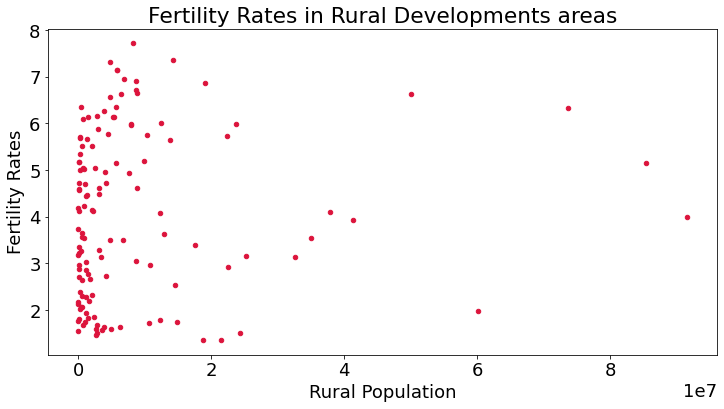

In [27]:
f = fertility_no_outliers.plot.scatter(x='Data.Rural Development.Rural Population', y = "Data.Health.Fertility Rate",c = 'crimson', figsize = (12,6))
f.set_xlabel('Rural Population')
f.set_ylabel("Fertility Rates")
f.set_title("Fertility Rates in Rural Developments areas")

## Q9: How do the fertility rates of rural population compare with Urban population?


Text(0.5, 1.0, 'Population Percentages in Rural and Urban areas vs Fertility Rates')

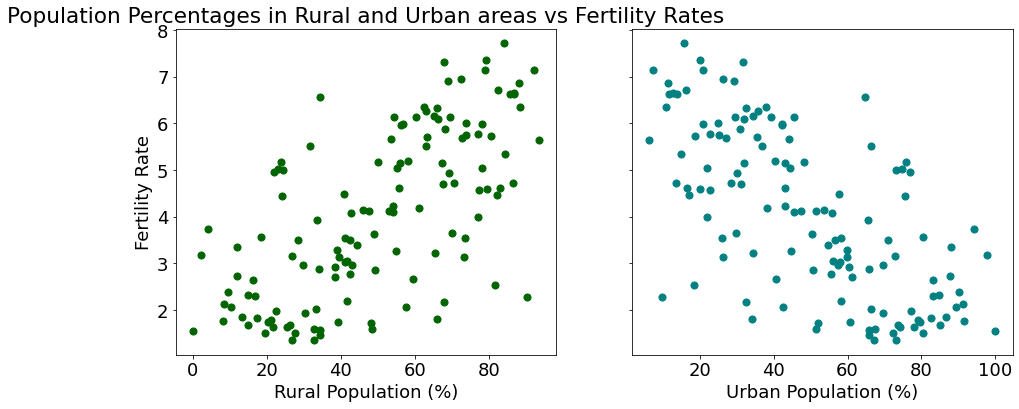

In [28]:
fig, axes = plt.subplots(ncols = 2, sharey = True)
z = fertility_no_outliers.plot.scatter(x='Rural_Population_percent', y = "Data.Health.Fertility Rate", ax = axes[0], figsize = (15,6),s=50, color = 'darkgreen')
w = fertility_no_outliers.plot.scatter(x='Data.Urban Development.Urban Population Percent', y = "Data.Health.Fertility Rate", ax = axes[1],figsize = (15,6),s=50,  color = 'teal')
z.set_xlabel('Rural Population (%)')
z.set_ylabel('Fertility Rate')
w.set_xlabel("Urban Population (%)")
z.set_title("Population Percentages in Rural and Urban areas vs Fertility Rates")

### -  Fertility rates tend to be higher among the rural population, while there seems to be lower fertility rates in areas with higher urban populations. The graphs are mirrored with the way that fertility rates increase as rural populations increase, while rates decrease as urban populations increase.

## Q 10: What is the rate of urbanization in each country?


In [29]:
#make a dictionary with country as key, urban population percent growth as values

urbanization_per_country = {}
for country in select_country_development:
    if not country['Country'] in urbanization_per_country:
        urbanization_per_country[country['Country']] = []

for data in select_country_development:
    for country in urbanization_per_country:    
        if data['Country'] == country:
            #select urban population percent growth and append it to the matching country
            urbanization_per_country[country].append(data['Data']['Urban Development']['Urban Population Percent Growth'])


In [30]:
#the range of years in select_country_development and urbanization_per_country
year_list = []
for data in select_country_development:
    year_list.append(data['Year'])
year_list = sorted(list(set(year_list)))
print(min(year_list), max(year_list))

1960 2013


In [31]:
#countries in emissions_csv with data from 1970-2013
emissions_1970on = emissions_df[emissions_df["Year"] >= 1970]
#emissions_1970on.head()
emissions_1980on = emissions_df[emissions_df["Year"] >= 1980]

In [32]:
#drop rows in emissions_1970on with countries not in global_development
emissions_countries_1970on = sorted(list(set(list(emissions_1970on['Country']))))
for country in emissions_countries_1970on:
    if not country in development_countries:
        emissions_countries_1970on.remove(country)

In [33]:
#What is the range of years in emissions_1970on?
print(emissions_1970on["Year"].min(),emissions_1970on["Year"].max())

1970 2012


## Q 11: What is the average rate of urbanization in each country represented in urbanization_per_country? 


In [34]:
#(the time period covered for each country is different though - not all countries had development data from 1980-2013)
avg_urbanization_rates = {}
for country in urbanization_per_country:
    avg_urbanization = sum(urbanization_per_country[country])/len(urbanization_per_country[country])
    avg_urbanization_rates[country] = avg_urbanization
#print(avg_urbanization_rates)
avg_urbanization_rates

{'Canada': 1.298763131001151,
 'Sao Tome and Principe': 4.103851961941924,
 'Cambodia': 6.004258716317483,
 'Ethiopia': 4.663264906464723,
 'Sri Lanka': 0.9373880495302516,
 'Swaziland': 3.051394882635539,
 'Argentina': 1.5139394078732207,
 'Bolivia': 3.3969835443864764,
 'Burkina Faso': 6.4586006227081345,
 'Bahrain': 4.2308213470965015,
 'Saudi Arabia': 4.257367134843291,
 'Guatemala': 3.288237069266146,
 'Guinea': 4.24985485643465,
 'Liberia': 3.6425870335301345,
 'Maldives': 4.544510013554159,
 'Oman': 5.0604618690580985,
 'Tanzania': 5.208883254063751,
 'Gabon': 4.130689587733915,
 'New Zealand': 1.6481132515537027,
 'Jamaica': 1.2766539155776486,
 'Albania': 1.6977249221175317,
 'United Arab Emirates': 7.24288777507061,
 'India': 2.832080963053704,
 'Madagascar': 4.7796860022530785,
 'Lesotho': 3.8936064266918273,
 'Turkey': 3.1830515725801227,
 'Bangladesh': 4.747139901047142,
 'Solomon Islands': 4.961053932344545,
 'Lebanon': 2.1664114007016546,
 'Mongolia': 2.55416485521074,
 

## Q 12: What is the yearly growth rate of CO2 emissions per country?

In [35]:
#column names in emissions_csv
list(emissions_1970on.columns)

['Country',
 'Year',
 'Emissions.Type.CO2',
 'Emissions.Type.N2O',
 'Emissions.Type.CH4',
 'Emissions.Sector.Power Industry',
 'Emissions.Sector.Buildings',
 'Emissions.Sector.Transport',
 'Emissions.Sector.Other Industry',
 'Emissions.Sector.Other sectors',
 'Ratio.Per GDP',
 'Ratio.Per Capita']

In [36]:
#Find the raw data for CO2 emission rates per country from 1970-2012

raw_CO2_emissions = {}
for row in emissions_1970on.itertuples(index=False, name="Country"):
    if not row[0] in raw_CO2_emissions:
        raw_CO2_emissions[row[0]] = []
    raw_CO2_emissions[row[0]].append(row[2])

print(raw_CO2_emissions['Afghanistan'])

[2670.0, 2630.0, 2180.0, 2310.0, 2520.0, 2720.0, 2800.0, 2780.0, 2780.0, 2700.0, 2750.0, 2710.0, 2780.0, 2630.0, 2520.0, 2330.0, 1990.0, 2140.0, 2210.0, 2200.0, 2170.0, 2220.0, 2180.0, 2230.0, 2030.0, 2170.0, 2390.0, 2620.0, 2810.0, 3050.0, 2690.0, 2450.0, 2780.0, 2880.0, 2870.0, 2980.0, 2820.0, 2790.0, 3060.0, 3250.0, 3610.0, 3650.0, 3610.0]


In [37]:
CO2_yearly_growth = {}
for country in raw_CO2_emissions:
    if not country in CO2_yearly_growth:
        CO2_yearly_growth[country] = []
    for i in range(len(raw_CO2_emissions[country])-1):
        CO2_yearly_growth[country].append(100*(raw_CO2_emissions[country][i+1]-raw_CO2_emissions[country][i])/raw_CO2_emissions[country][i])


## Q 13: What is the average yearly CO2 emissions rate per country?

In [38]:
avg_yearly_CO2emissions_per_country = {}
for country in CO2_yearly_growth:
    avg_yearly_CO2emissions_per_country[country] = sum(CO2_yearly_growth[country])/len(CO2_yearly_growth[country])

avg_yearly_CO2emissions_per_country

{'Afghanistan': 0.967670919278162,
 'Albania': 0.7745603992115112,
 'Algeria': 2.884134459286997,
 'Angola': 2.1476302988088816,
 'Anguilla': 4.890269443141471,
 'Antigua and Barbuda': 2.2759611638515933,
 'Argentina': 1.433759015824681,
 'Armenia': 1.0079565765144387,
 'Australia': 0.6976737824808389,
 'Austria': -0.7758520890708104,
 'Azerbaijan': 0.9895397242523081,
 'Bahamas': 2.8866119873978655,
 'Bahrain': 4.653788697423879,
 'Bangladesh': 2.3907205966595746,
 'Barbados': 0.17270305490250115,
 'Belarus': 2.6811368697966858,
 'Belgium': 0.0983558653794193,
 'Belize': 1.6221163608451141,
 'Benin': 3.1465476796079384,
 'Bermuda': 3.518113407052639,
 'Bhutan': 1.9908490110622885,
 'Bolivia': 3.0074867479530463,
 'Bosnia and Herzegovina': 0.054812253341591205,
 'Botswana': 1.4038928564929616,
 'Brazil': 2.868039510515139,
 'Brunei': 0.6007628091920193,
 'Bulgaria': -2.111836688003538,
 'Burkina Faso': 4.360851078611969,
 'Burundi': 3.9001424159363274,
 'Cambodia': 6.6447542510424205,


## Q 14: Plot avg_yearly_CO2emissions_per_country against avg_urbanization_rates to see if higher rates of urbanization are associated with higher levels of CO2 emissions.


In [39]:
#create a dataframe with avg_yearly_CO2emissions_per_country and avg_urbanization_rates 
yearly_emissions_series = Series(avg_yearly_CO2emissions_per_country)
yearly_urbanization_series = Series(avg_urbanization_rates)
emissions_urbanization_df_1 = DataFrame({
    "yearly_CO2_emissions (kilotons)": yearly_emissions_series,
    "yearly_urban_growth": yearly_urbanization_series
})

In [40]:
#dataframe where all the rows with NaN values are dropped
emissions_urbanization_df = emissions_urbanization_df_1.dropna(axis=0, how="any")
emissions_urbanization_df

,yearly_CO2_emissions (kilotons),yearly_urban_growth
Afghanistan,0.967671,3.962710
Albania,0.774560,1.697725
Algeria,2.884134,3.650243
Angola,2.147630,5.483447
Antigua and Barbuda,2.275961,-0.240559
...,...,...
United States,-0.029507,1.293249
Uruguay,1.679915,0.822497
Vanuatu,5.145938,4.110851
Zambia,0.421711,2.907842


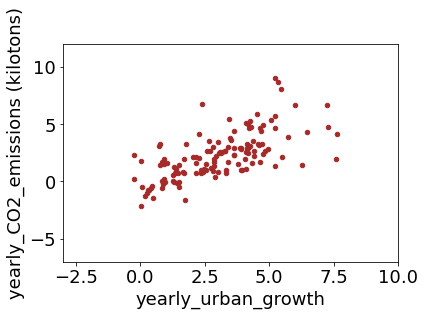

In [41]:
ax = emissions_urbanization_df.plot.scatter(x = "yearly_urban_growth", y = "yearly_CO2_emissions (kilotons)", xlim=(-3,10), ylim=(-7,12), color = "brown")

assert emissions_urbanization_df[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert emissions_urbanization_df[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert emissions_urbanization_df[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert emissions_urbanization_df[ax.get_ylabel()].max() <= ax.get_ylim()[1]

There does appear to be a general upward trend in CO2 emissions corresponding to yearly growth in urban populations across all countries in the datasets.

But there are some outliers - such as the data points around x=5.5 and y=9.8 and x=7.5 and y=2.5. We will look at two such outliers below.

## Q 15: What is the yearly growth of CO2 emissions in Rwanda from 1970-2012?

In [42]:
#avg urbanization rate and avg CO2 emission rate for Rwanda
print(avg_urbanization_rates['Rwanda'])
print(avg_yearly_CO2emissions_per_country['Rwanda'])

#checking to see if there is emissions data for Rwanda for each consecutive year between 1970 and 2012
emissions_Rwanda = emissions_1970on[emissions_1970on["Country"] == 'Rwanda']

7.654569686391676
4.174814100595329


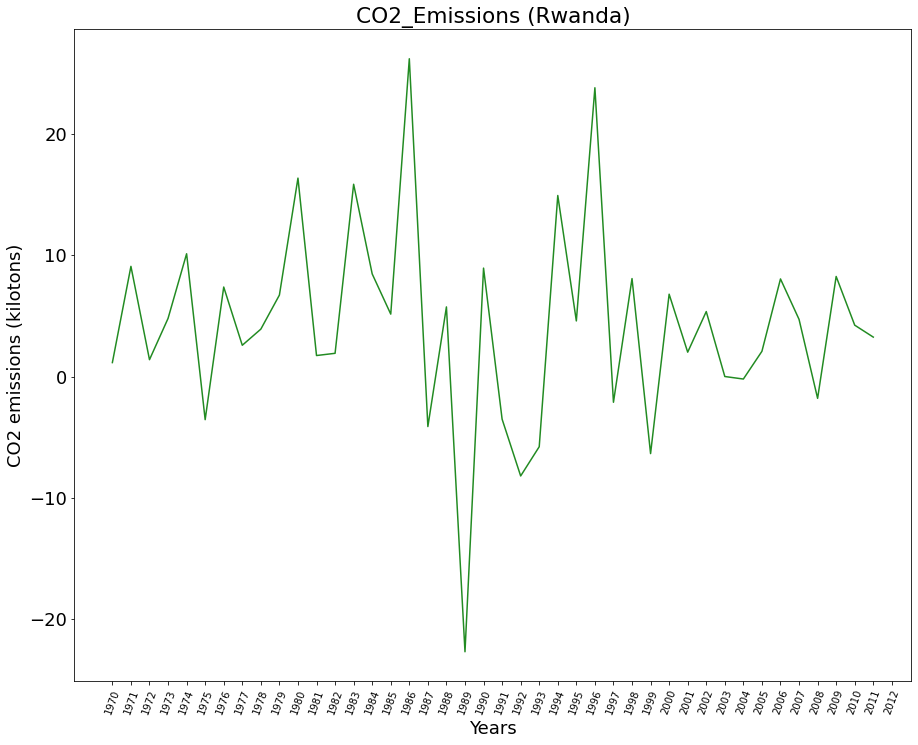

In [43]:
rwanda_emissions = Series(CO2_yearly_growth['Rwanda'])
ax = rwanda_emissions.plot.line(figsize=(15,12), color = "forestgreen") 
ax.set_title("CO2_Emissions (Rwanda)")
ax.set_xlabel("Years")
ax.set_ylabel("CO2 emissions (kilotons)")
ax.set_xticks(range((2012-1970)+1)) 
ax.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

In [44]:
#What is the range of years for which there is development data for Rwanda? 
#(because the time period covered for each country in urbanization_per_country is different)
df = DataFrame(select_country_development)
print(df[df["Country"] == "Rwanda"]["Year"].min(), df[df["Country"] == "Rwanda"]["Year"].max())

1980 2013


## Q16. Plot the urban population growth per year in Rwanda from 1980-2012 (note the 10 year difference in starting points between the CO2 emissions and urbanization data)

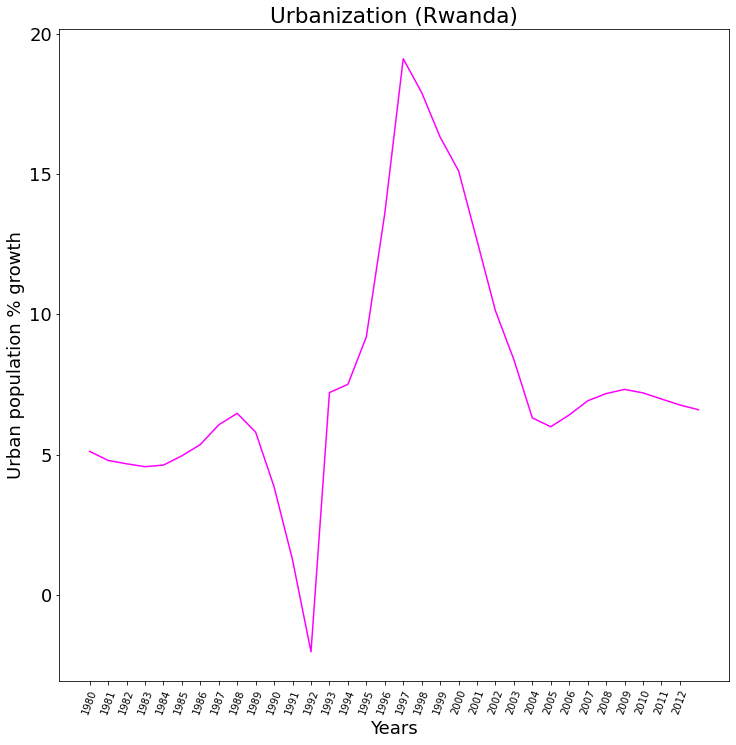

In [45]:
rwanda_urbanization = Series(urbanization_per_country['Rwanda'])
ax = rwanda_urbanization.plot.line(figsize=(12,12), color="magenta") 
ax.set_title("Urbanization (Rwanda)")
ax.set_xlabel("Years")
ax.set_ylabel("Urban population % growth")
ax.set_xticks(range((2012-1980)+1)) 
ax.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

## Q17: How does the rate of CO2 emissions compare to urban population growth in Rwanda from 1980-2012?

### NOTE: Is there a way to make only periodic x-ticks appear on my x axes (such as displaying "Years" in ten-year blocks?) 

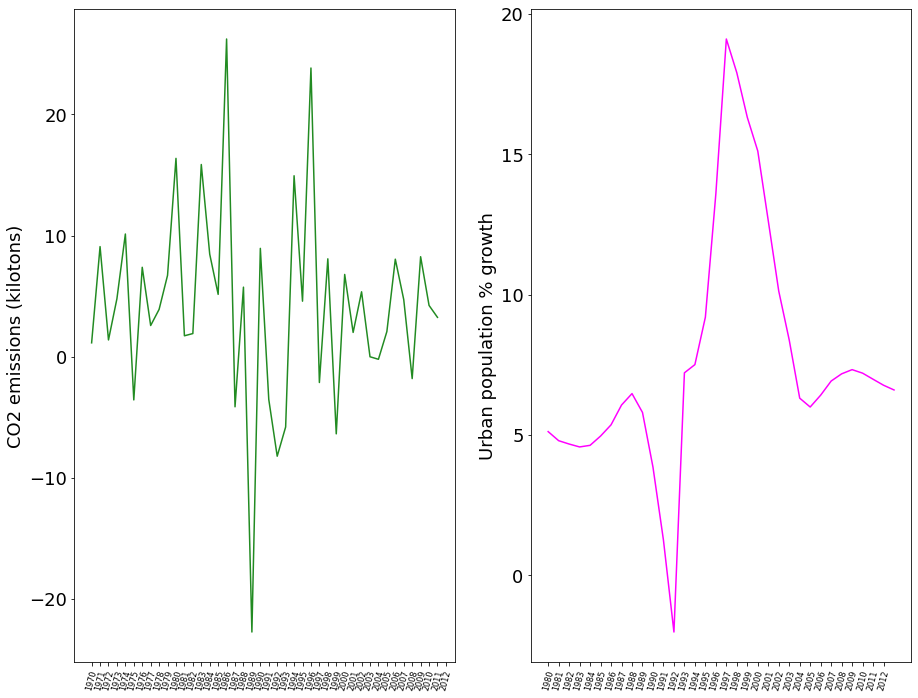

In [46]:
t = plt.subplots(ncols=2, figsize=(15,12))
plt.subplots_adjust(wspace=0.2)
ax_list = list(t[1])
ax_rwanda = rwanda_emissions.plot.line(ax = ax_list[0], color = "forestgreen")
ax_rwanda.set_ylabel('CO2 emissions (kilotons)')
ax_rwanda.set_xticks(range((2012-1970)+1))
ax_rwanda.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 75, fontsize=8)

ax_rwanda_urbanization = rwanda_urbanization.plot.line(ax = ax_list[1], color = "magenta")
ax_rwanda_urbanization.set_ylabel('Urban population % growth')
ax_rwanda_urbanization.set_xticks(range((2012-1980)+1))
ax_rwanda_urbanization.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 75, fontsize=8)
None

### Observations:
#### 1. 1989 seems to be a special year in Rwanda's history because of a steep negative CO2 emissions rate. 
#### 2. The sharp urban population growth in Rwanda from around 1995-1997 seems to coincide with the sharp increase in CO2 emissions during the same period - implying a general correlation between the two phenomena.

## Q18: What is the yearly growth of CO2 emissions in Cambodia from 1970-2012?

In [47]:
#avg urbanization rate and avg CO2 emission rate for Cambodia
print(avg_urbanization_rates['Cambodia'])
print(avg_yearly_CO2emissions_per_country['Cambodia'])

6.004258716317483
6.6447542510424205


In [48]:
#checking to see if there is emissions data for Cambodia for each consecutive year between 1970 and 2012
emissions_Cambodia = emissions_1970on[emissions_1970on["Country"] == 'Cambodia']

In [49]:
#What is the range of years for which there is development data for Cambodia? 
#(because the time period covered for each country in urbanization_per_country is different)
df = DataFrame(select_country_development)
print(df[df["Country"] == "Cambodia"]["Year"].min(), df[df["Country"] == "Cambodia"]["Year"].max())

1980 2013


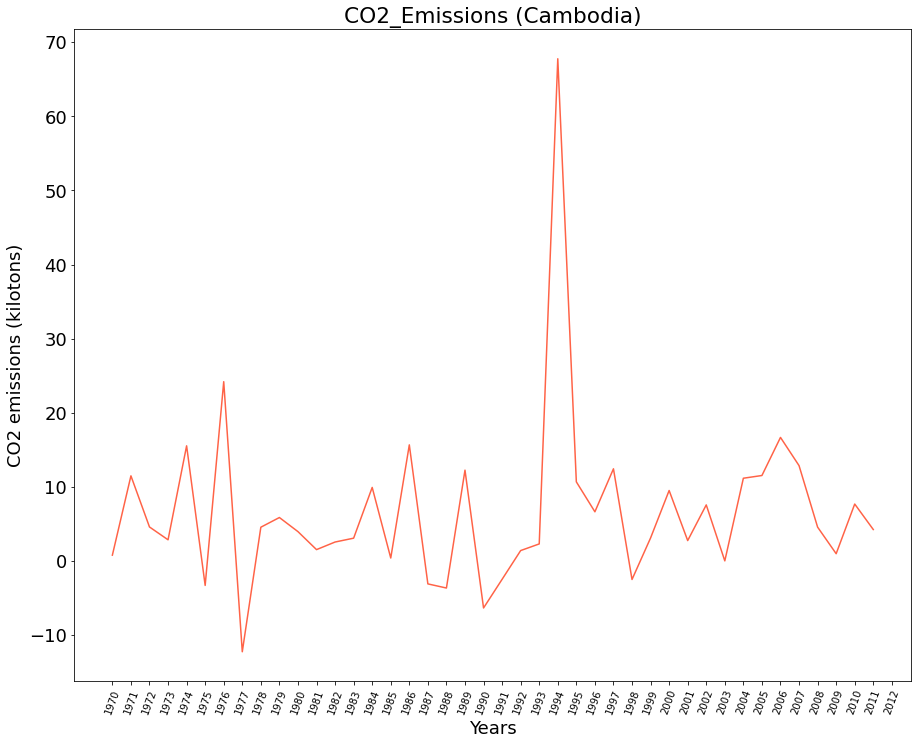

In [50]:
cambodia_emissions = Series(CO2_yearly_growth['Cambodia'])
ax = cambodia_emissions.plot.line(figsize=(15,12), color = "tomato") #this controls the width, height of the plot
ax.set_title("CO2_Emissions (Cambodia)")
ax.set_xlabel("Years")
ax.set_ylabel("CO2 emissions (kilotons)")
ax.set_xticks(range((2012-1970)+1)) 
ax.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

## Q19: Plot the urban population growth per year in Cambodia from 1980-2012 (note the 10 year difference in starting points between the CO2 emissions and urbanization data for Cambodia)

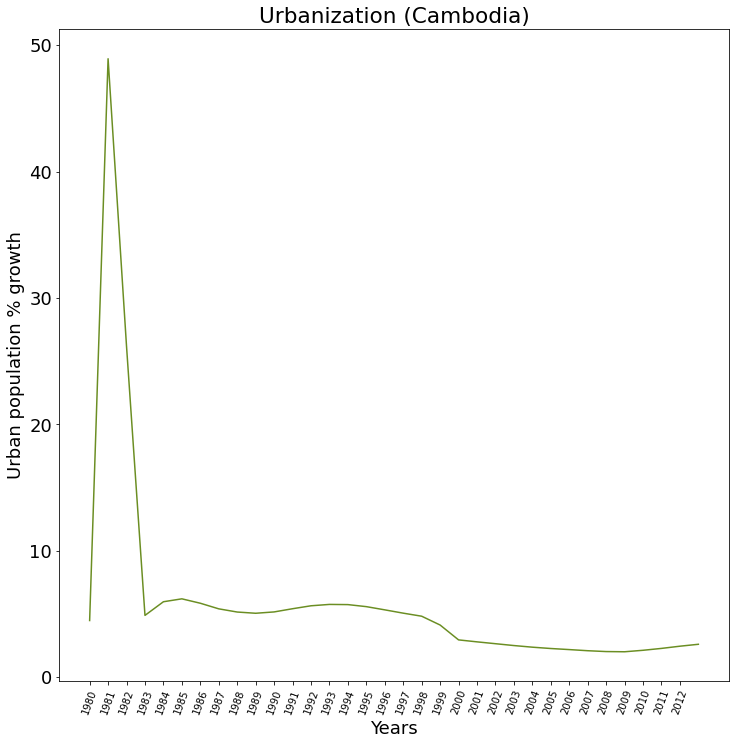

In [51]:
cambodia_urbanization = Series(urbanization_per_country['Cambodia'])
ax = cambodia_urbanization.plot.line(figsize=(12,12), color="olivedrab") 
ax.set_title("Urbanization (Cambodia)")
ax.set_xlabel("Years")
ax.set_ylabel("Urban population % growth")
ax.set_xticks(range((2012-1980)+1)) 
ax.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

## Q20: How does the rate of CO2 emissions compare to urban population growth in Cambodia from 1980-2012?

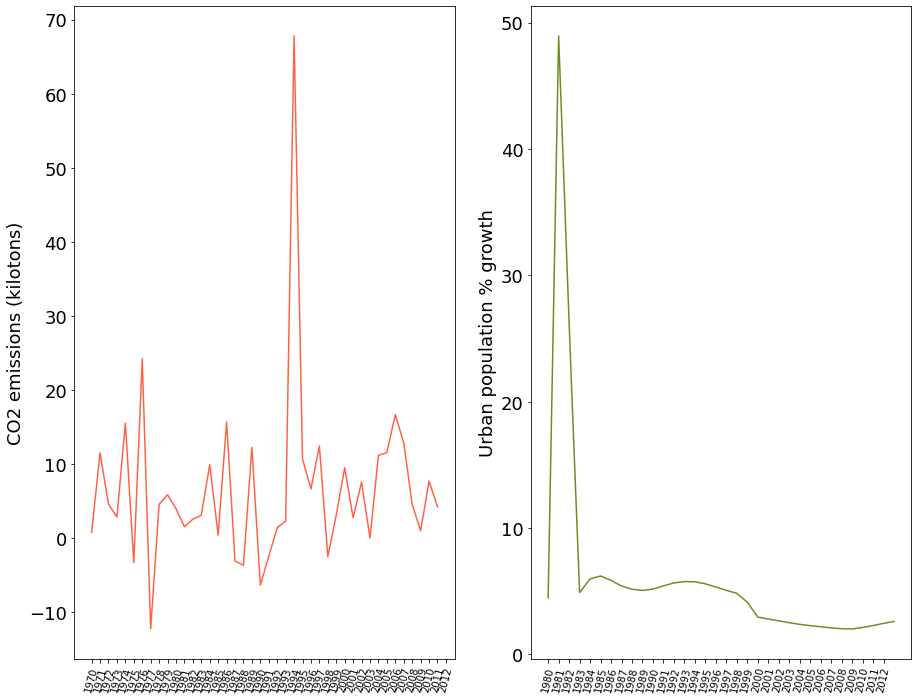

In [52]:
t = plt.subplots(ncols=2, figsize=(15,12))
plt.subplots_adjust(wspace=0.2)
ax_list = list(t[1])
ax_cambodia = cambodia_emissions.plot.line(ax = ax_list[0], color = "tomato")
ax_cambodia.set_ylabel('CO2 emissions (kilotons)')
ax_cambodia.set_xticks(range((2012-1970)+1))
ax_cambodia.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 75, fontsize=10)

ax_cambodia_urbanization = cambodia_urbanization.plot.line(ax = ax_list[1], color = "olivedrab")
ax_cambodia_urbanization.set_ylabel('Urban population % growth')
ax_cambodia_urbanization.set_xticks(range((2012-1980)+1))
ax_cambodia_urbanization.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 77, fontsize=10)
None

### Observations: 
#### 1. CO2 emissions peaked around 1994 in Cambodia but the sharpest increase in its urban population growth preceded this growth, with the highest urban % growth in Cambodia happening around 1980-1981. This implies that urban population growth was not the main reason for CO2 emissions in Cambodia.

## Q21: Compare the CO2 emissions with the development in Bhutan

In [53]:
print(avg_urbanization_rates['Bhutan'])
print(avg_yearly_CO2emissions_per_country['Bhutan'])

7.59450349358896
1.9908490110622885


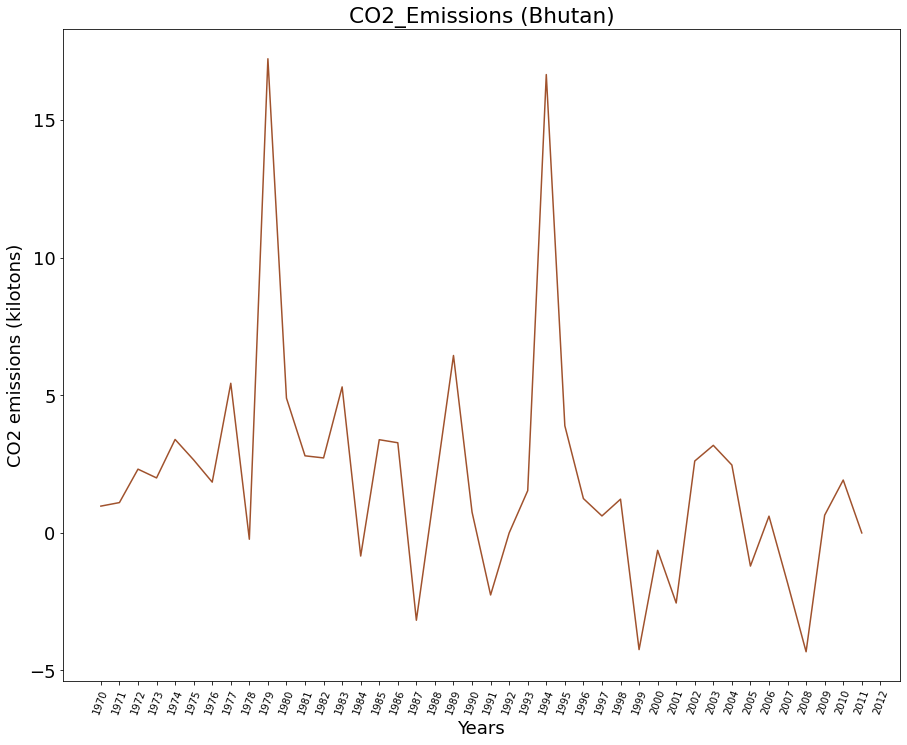

In [54]:
#yearly growth of CO2 emissions in Bhutan from 1970-2012
bhutan_emissions = Series(CO2_yearly_growth['Bhutan'])
ax = bhutan_emissions.plot.line(figsize=(15,12), color = "sienna") 
ax.set_title("CO2_Emissions (Bhutan)")
ax.set_xlabel("Years")
ax.set_ylabel("CO2 emissions (kilotons)")
ax.set_xticks(range((2012-1970)+1)) 
ax.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

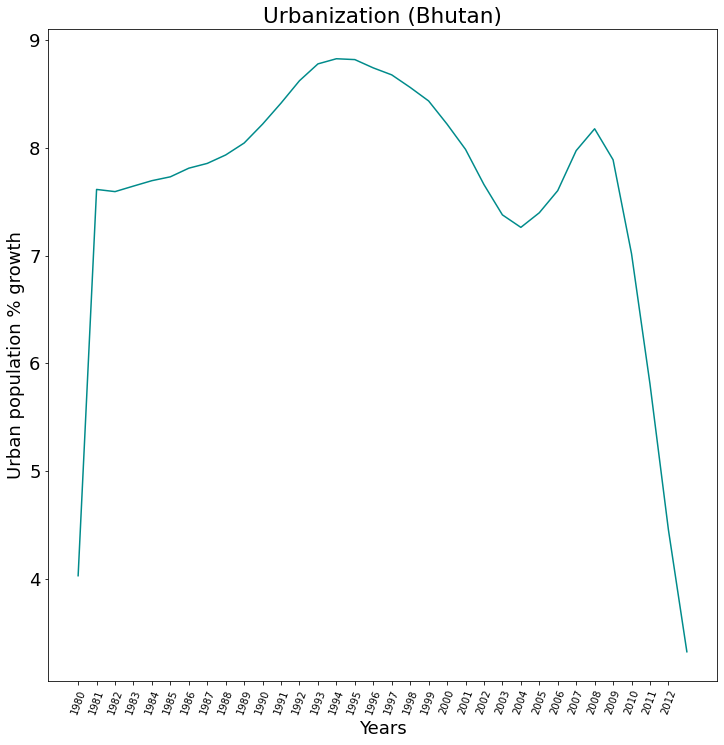

In [55]:
#urban population percent growth per year in Bhutan from 1980-2012
bhutan_urbanization = Series(urbanization_per_country['Bhutan'])
ax = bhutan_urbanization.plot.line(figsize=(12,12), color = "darkcyan") 
ax.set_title("Urbanization (Bhutan)")
ax.set_xlabel("Years")
ax.set_ylabel("Urban population % growth")
ax.set_xticks(range((2012-1980)+1)) 
ax.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 70, fontsize=10)
None

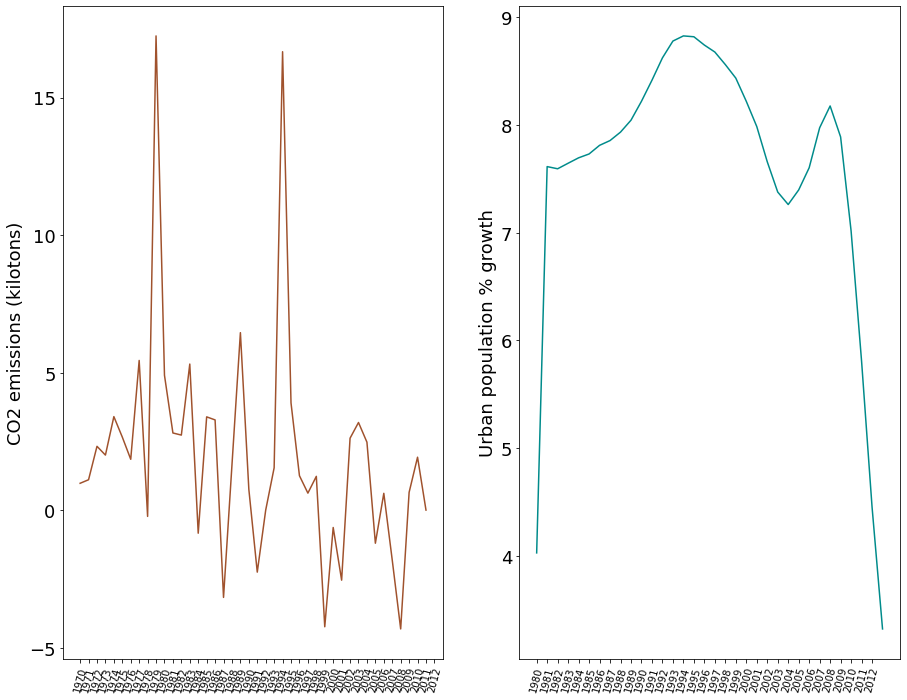

In [56]:
t = plt.subplots(ncols=2, figsize=(15,12))
plt.subplots_adjust(wspace=0.2)
ax_list = list(t[1])
ax_bhutan = bhutan_emissions.plot.line(ax = ax_list[0], color = "sienna")
ax_bhutan.set_ylabel('CO2 emissions (kilotons)')
ax_bhutan.set_xticks(range((2012-1970)+1))
ax_bhutan.set_xticklabels(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                    '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 75, fontsize=10)

ax_bhutan_urbanization = bhutan_urbanization.plot.line(ax = ax_list[1], color = "darkcyan")
ax_bhutan_urbanization.set_ylabel('Urban population % growth')
ax_bhutan_urbanization.set_xticks(range((2012-1980)+1))
ax_bhutan_urbanization.set_xticklabels(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                    '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                    '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                   '2010','2011','2012'], rotation = 75, fontsize=10)
None

### Observations:

#### 1. Highest urban population % growth happened from about 1990-1994 in Bhutan, but this period did not see a unilinear increase in CO2 emissions there. Instead there was a big drop in CO2 emissions around 1991. 
#### 2. The overall trend between the two also suggests that rise in urban population percent growth (and a long period of sustained high urban population percent) does not always correspond with high CO2 emissions. This is likely related to the fact that Bhutan has been a carbon-negative country that places restrictions on tourism and deforestation.

## Q22: Is there a relationship between Life Expectancies and Cellular Subscriptions (which might serve as proxy for better infrastructure)? 
### Looking at three countries: China, Indonesia, and Malaysia

In [57]:
cell_subscription_percentage = {}
for data in select_country_development:
    if not data['Country'] in cell_subscription_percentage:
        cell_subscription_percentage[data['Country']] = []
    cell_subscription_percentage[data['Country']].append(data['Data']['Infrastructure']['Mobile Cellular Subscriptions per 100 People'])

life_expectancy_dict = {}
for data in select_country_development:
    if not data['Country'] in life_expectancy_dict:
        life_expectancy_dict[data['Country']] = []
    life_expectancy_dict[data['Country']].append(data['Data']['Health']['Life Expectancy at Birth, Total'])

In [58]:
#China
country_name = "China"
country_cell_percent = cell_subscription_percentage[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_cell_percent)
China_df = DataFrame({
    "country": country_name_list,
    "cell subscription/100 people": country_cell_percent,
    "life expectancy": country_life_expectancy
})

In [59]:
#Indonesia
country_name = "Indonesia"
country_cell_percent = cell_subscription_percentage[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_cell_percent)
Indonesia_df = DataFrame({
    "country": country_name_list,
    "cell subscription/100 people": country_cell_percent,
    "life expectancy": country_life_expectancy
})

In [60]:
#Malaysia
country_name = "Malaysia"
country_cell_percent = cell_subscription_percentage[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_cell_percent)
Malaysia_df = DataFrame({
    "country": country_name_list,
    "cell subscription/100 people": country_cell_percent,
    "life expectancy": country_life_expectancy
})
#Malaysia_df

In [61]:
vertical_stack = pd.concat([China_df, Indonesia_df, Malaysia_df], axis=0) 
combined_df = vertical_stack.reset_index(drop=True)
combined_df.head()

,country,cell subscription/100 people,life expectancy
0,China,0.0,66.762293
1,China,0.0,67.023610
2,China,0.0,67.297659
3,China,0.0,67.572098
4,China,0.0,67.836512


In [62]:
country_counts = combined_df['country'].value_counts()
country_counts

China        34
Indonesia    34
Malaysia     34
Name: country, dtype: int64

<AxesSubplot:xlabel='cell subscription/100 people', ylabel='life expectancy'>

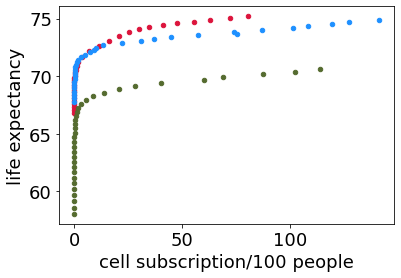

In [63]:
ax = combined_df[combined_df['country'] == 'China'].plot.scatter(x = "cell subscription/100 people", y = "life expectancy", c = "crimson")
combined_df[combined_df['country'] == 'Indonesia'].plot.scatter(x = "cell subscription/100 people", y = "life expectancy", c = "darkolivegreen", ax=ax)
combined_df[combined_df['country'] == 'Malaysia'].plot.scatter(x = "cell subscription/100 people", y = "life expectancy", c = "dodgerblue", ax=ax)

## Observations from plotting Life Expectancy against Cell Subscription/100 people

#### 1. Life expectancies improved across all three countries prior to the introduction of cellular phones into these three countries.
#### 2. There does not seem to be an obvious correlation between cellular subscription rates and life expectancy at birth for China, Indonesia, and Malaysia - three developing countries in Asia from 1980-2013. 

## Q23: Is there a relationship between Telephone Lines per 100 People and Life Expectancy per Country (where telephone liness might be a proxy indicator for electrification)?

### Looking at three countries: China, Indonesia, and Malaysia

In [64]:
telephone_lines_per_100_dict = {}
for data in select_country_development:
    if not data['Country'] in telephone_lines_per_100_dict:
        telephone_lines_per_100_dict[data['Country']] = []
    telephone_lines_per_100_dict[data['Country']].append(data['Data']['Infrastructure']['Telephone Lines per 100 People'])

In [65]:
#China
country_name = "China"
country_telephone_lines = telephone_lines_per_100_dict[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_telephone_lines)
China_telephone_df = DataFrame({
    "country": country_name_list,
    "telephone lines per 100 people": country_telephone_lines,
    "life expectancy": country_life_expectancy
})

In [66]:
#Indonesia
country_name = "Indonesia"
country_telephone_lines = telephone_lines_per_100_dict[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_telephone_lines)
Indonesia_telephone_df = DataFrame({
    "country": country_name_list,
    "telephone lines per 100 people": country_telephone_lines,
    "life expectancy": country_life_expectancy
})

In [67]:
#Malaysia
country_name = "Malaysia"
country_telephone_lines = telephone_lines_per_100_dict[country_name]
country_life_expectancy = life_expectancy_dict[country_name]
country_name_list = [country_name] * len(country_telephone_lines)
Malaysia_telephone_df = DataFrame({
    "country": country_name_list,
    "telephone lines per 100 people": country_telephone_lines,
    "life expectancy": country_life_expectancy
})

In [68]:
vertical_stack_telephone = pd.concat([China_telephone_df, Indonesia_telephone_df, Malaysia_telephone_df], axis=0)
combined_df_telephone = vertical_stack_telephone.reset_index(drop=True)
combined_df_telephone

,country,telephone lines per 100 people,life expectancy
0,China,0.209500,66.762293
1,China,0.217547,67.023610
2,China,0.222518,67.297659
3,China,0.231350,67.572098
4,China,0.244019,67.836512
...,...,...,...
97,Malaysia,16.533377,74.161463
98,Malaysia,16.279047,74.325927
99,Malaysia,16.302967,74.495585
100,Malaysia,15.726920,74.668390


In [69]:
country_counts_telephone = combined_df_telephone['country'].value_counts()
country_counts_telephone

China        34
Indonesia    34
Malaysia     34
Name: country, dtype: int64

<AxesSubplot:xlabel='telephone lines per 100 people', ylabel='life expectancy'>

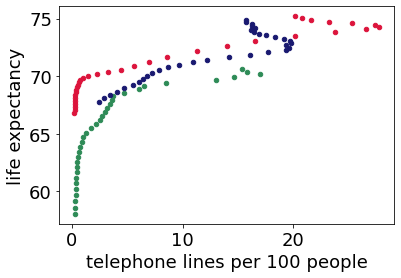

In [70]:
ax = combined_df_telephone[combined_df['country'] == 'China'].plot.scatter(x = "telephone lines per 100 people", y = "life expectancy", c = "crimson")
combined_df_telephone[combined_df['country'] == 'Indonesia'].plot.scatter(x = "telephone lines per 100 people", y = "life expectancy", c = "seagreen", ax=ax)
combined_df_telephone[combined_df['country'] == 'Malaysia'].plot.scatter(x = "telephone lines per 100 people", y = "life expectancy", c = "midnightblue", ax=ax)

## Observations from plotting Telephone Lines per 100 people against Life Expectancy

#### 1. The data for Malaysia suggests that at around 19 telephone lines per 100 people, the telephone lines per person began declining even as life expectancy continues to rise. This might suggest a cut-off point in telephone line development where people began using other modes of advanced telecommunication methods that no longer require physical telephone lines.

#### 2. Malaysia's telephone lines per 100 people also started out higher than those of China and Indonesia in 1980, suggesting that improvements in communication infrastructure happened in Malaysia earlier than in the other two countries.